In [1]:
import pandas as pd
import numpy as np
import glob 
import altair as alt
import sqlite3
import os
#Descomentar línea de abajo ↓ en la primera ejecucución. 
#!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport
import sqlalchemy
#Se adiciona en caso de que se cree el archivo en base al libro.

#Para iniciar por favor cambie ↓ la siguiente línea por la ruta donde clonó el repositorio
RutaJSON=r"C:\Users\anliscen\Documents\LuloTP\LuloTP"
#        ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
try:
  os.mkdir(RutaJSON+'\json')
except:
  print("El directorio ya existe en la ruta")

El directorio ya existe en la ruta


In [2]:
from pandas.core.reshape.merge import string
#Se inicia con la obtención de los datos para el presente mes de 2022-12-*
path_base ="http://api.tvmaze.com/schedule/web?date=2020-12-"
archivo= pd.read_json(path_base +"01")

#RutaJSON=r"C:\Users\Alejandro Moncada\Documents\LuloTP"
#array=np.empty(31, str)
#se usa el Zfill para agregar digito falante a los datos <10.
for ix in range(31):
  #pd.read_json
  df=pd.read_json(path_base +str(ix+1).zfill(2))
  df.to_json(RutaJSON+'\json'+'\TV_Maze'+str(ix+1).zfill(2)+".json")
  print(path_base +str(ix+1).zfill(2) + ' Export Complete')

http://api.tvmaze.com/schedule/web?date=2020-12-01 Export Complete
http://api.tvmaze.com/schedule/web?date=2020-12-02 Export Complete
http://api.tvmaze.com/schedule/web?date=2020-12-03 Export Complete
http://api.tvmaze.com/schedule/web?date=2020-12-04 Export Complete
http://api.tvmaze.com/schedule/web?date=2020-12-05 Export Complete
http://api.tvmaze.com/schedule/web?date=2020-12-06 Export Complete
http://api.tvmaze.com/schedule/web?date=2020-12-07 Export Complete
http://api.tvmaze.com/schedule/web?date=2020-12-08 Export Complete
http://api.tvmaze.com/schedule/web?date=2020-12-09 Export Complete
http://api.tvmaze.com/schedule/web?date=2020-12-10 Export Complete
http://api.tvmaze.com/schedule/web?date=2020-12-11 Export Complete
http://api.tvmaze.com/schedule/web?date=2020-12-12 Export Complete
http://api.tvmaze.com/schedule/web?date=2020-12-13 Export Complete
http://api.tvmaze.com/schedule/web?date=2020-12-14 Export Complete
http://api.tvmaze.com/schedule/web?date=2020-12-15 Export Comp

In [3]:
rutas = glob.glob(RutaJSON+"\json"+"\TV_Maze*"+".json")
partes_glob = [pd.read_json(ruta) for ruta in rutas]
TV_Maze = pd.concat(partes_glob)
TV_Maze.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3055 entries, 0 to 130
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3055 non-null   int64  
 1   url        3055 non-null   object 
 2   name       3055 non-null   object 
 3   season     3055 non-null   int64  
 4   number     2974 non-null   float64
 5   type       3055 non-null   object 
 6   airdate    3055 non-null   object 
 7   airtime    3055 non-null   object 
 8   airstamp   3055 non-null   object 
 9   runtime    2836 non-null   float64
 10  rating     3055 non-null   object 
 11  image      1017 non-null   object 
 12  summary    886 non-null    object 
 13  _links     3055 non-null   object 
 14  _embedded  3055 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 381.9+ KB


# 1. Se importan los datos del mes de diciembre 2020
Se realiza la importación de la data solicitada, en este caso dado que el API Rest schedule no se encontró una función equivalente a year ya que devolvia los valores por defecto al realizar el uso de funciones con operadores booleanos (los shows emitidos en la fecha actual) se optó por realizar la importación de schedule día por día, es un proceso que se puede mejorar dado que toma aproximadamente 30 segundos recorrer el ciclo *for* y obtener la información, dentro del bucle son creados los archivos JSON obtenidos y lo que realicé fué unir todos estos archivos usando glob.glob para asegurarme que todos los archivos inicien en TV_Maze y finalicen con .json.

Nota: La función *zfill(2)* la uso para indicar que los valores que solo contengan 1 digito completen el segundo digito con un cero (0) a la izquierda dado que es requisito para la fecha en el formato **ISO-8601**  AAAA-MM-DD.

In [4]:
bn= pd.DataFrame(TV_Maze._embedded.values.tolist())['show']
TV_Maze_Show=pd.json_normalize(bn)

## 2. Generación de DataFrames 
En esta sección contamos con los dataframes a trabajar, (1) TV_Maze que corresponde a la información obtenida de Schedule que nos da un vistazo general de la información.  Y (2) TV_Maze_Show, que expande la columna _embedded que contiene toda la información del Show que considero mucho más útil dado que encontramos un mayor cantidad de variables categóricas que servirán mas adelante.

En este caso nuestros segundo dataset contiene ya filtrados los datos que corresponden a TV_Shows emitidos en el mes de Dic-2020 por lo que no es necesario realizar una cruce de tablas para cumplir con esta condición.




## 3. Profiling de los DF
En este proceso se hará uso como se solicitó de archivos profiling en HTML dado que permiten una mayor versatilidad a la hora de realizar la visualizaciones. 

In [5]:
#TV_Maze_Show.describe()
try:
  os.mkdir(RutaJSON+'\profiling')
except:
  print("El directorio ya existe en la ruta")

profile = ProfileReport(TV_Maze, title='Modelo TV Maze Schedule', html={'style':{'full_witdth':True}})
profile.to_file(RutaJSON+'\profiling'+'\Reporte TV Maze Schedule'+".html")

El directorio ya existe en la ruta


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### En base al reporte de TV Maze Schedule
Se encuentra que las columnas rating,_links y _embedded. En este punto no son tan útiles las dos primeras porque no aportan información valiosa ya que tienen un JSON embebido pero la mayor parte de los valores en el caso de rating son valores None, adicionalmente esta columna no presenta el ID de los datos.

##### Image
Contiene imágenes de los dato, sin embargo no son relevantes para el análisis en este punto. Puede servir para otro tipo de análisis. Sin embargo dado que 66.6% de los datos es una variable que puede ser suceptible a ser eliminada.

#### _embedded 
Ya en este punto se extrajo la información, es el dataset más valiosos tanto por la cantidad de información como porque permite vincular los DF TV_Maze y TV_Maze shows por medio de realizar un JOIN por medio del ID. EN ESTE PUNTO SE PUEDE ELIMINAR 

#### _ratings
Aporta información pero la mayor parte de los datos tiene este campo vacio, puede ser un indicador de popularidad de la serie.



In [6]:
#TV_Maze_Show.describe()
try:
  os.mkdir(RutaJSON+'\profiling')
except:
  print("El directorio ya existe en la ruta")

profile2 = ProfileReport(TV_Maze_Show, title='Modelo TV Maze Shows', html={'style':{'full_witdth':True}})
profile2.to_file(RutaJSON+'\profiling'+'\Reporte TV Maze Shows'+".html")

El directorio ya existe en la ruta


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\anliscen\AppData\Roaming\Python\Python39\site-packages\pandas_profiling\model\correlations.py:55: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### En base al reporte de datos de TV_Maze Shows
Se encuentra un DF con una nutrida cantidad de datos. A partir del cual se encuentra que este dataset será especialmente útil para el punto 6 de este informe. Ya que contiene Runtime, type, gender, name, rating. El dato de *country* no se encuentra en ninguno de los dataframes actuales, sin embargo si existe webChannel.country.name. 

# 5. Creación generar una BBDD con SQLite para los dataframes.

In [15]:
try:
  os.mkdir(RutaJSON+'\db')
except:
  print("El directorio ya existe en la ruta")

#conn = sqlite3.connect(')
engine = sqlalchemy.create_engine('sqlite:///'+RutaJSON+'\db'+'\TV_Maze.db')
sqlite_connection = engine.connect()
#TV_Maze_Show.to_sql("shows",engine,if_exists="replace")
sqlite_connection.close()

El directorio ya existe en la ruta


In [8]:
TV_Maze_Show.info()

TV_Maze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3055 non-null   int64  
 1   url                          3055 non-null   object 
 2   name                         3055 non-null   object 
 3   type                         3055 non-null   object 
 4   language                     3021 non-null   object 
 5   genres                       3055 non-null   object 
 6   status                       3055 non-null   object 
 7   runtime                      2048 non-null   float64
 8   averageRuntime               2895 non-null   float64
 9   premiered                    3055 non-null   object 
 10  ended                        1369 non-null   object 
 11  officialSite                 2657 non-null   object 
 12  weight                       3055 non-null   int64  
 13  network           

# 6. Información Solicitada

In [9]:
PA=TV_Maze_Show.groupby(TV_Maze_Show['type']).mean()
print('A continuación se presentan las cantidades por tipo para el promedio en base al runtime')
print(PA['runtime'])

print('\n'+'A continuación se presentan las cantidades por tipo para el promedio en base al AverageRuntime')
print(PA['averageRuntime'])

#pd.crosstab(index=TV_Maze_Show['type'],
#           columns=TV_Maze_Show['runtime'],margins=True)

A continuación se presentan las cantidades por tipo para el promedio en base al runtime
type
Animation       13.919014
Award Show     258.000000
Documentary     31.913333
Game Show       69.589744
News           112.173913
Panel Show      45.000000
Reality         37.711864
Scripted        36.389725
Sports         107.054795
Talk Show       42.013514
Variety         27.870370
Name: runtime, dtype: float64

A continuación se presentan las cantidades por tipo para el promedio en base al AverageRuntime
type
Animation       14.603989
Award Show     261.600000
Documentary     29.733542
Game Show       66.837209
News           108.153846
Panel Show      45.000000
Reality         40.585062
Scripted        35.837874
Sports          96.162162
Talk Show       40.561983
Variety         26.918033
Name: averageRuntime, dtype: float64


### Cuenta por genero.

Se genera el listado de valores por generos 

Drama              1100
Comedy              751
Romance             579
Crime               283
Mystery             235
Fantasy             219
Thriller            215
Action              209
Adventure           187
Children            181
History             144
Anime               130
Music               113
Family              107
Science-Fiction      93
Horror               71
Supernatural         69
Sports               64
Food                 52
War                  30
Travel               30
Nature               22
Adult                11
Medical              10
Legal                 5
DIY                   4
Name: Generos, dtype: int64


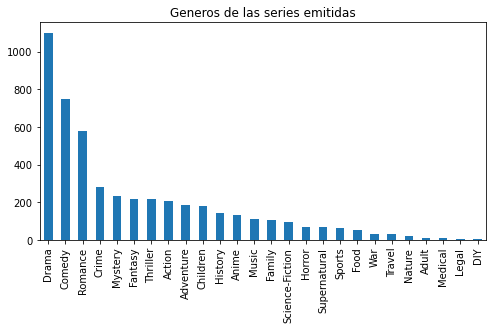

In [34]:
#Se requiere eliminar los corchetes cuadrados y generar datos.
#Es un vector de datos, no un String
#TV_Maze_Show["genres"].tolist()

#Se declara un nuevo arreglo
array2 =[]
#recorremos el arreglo 
for e in range(len(TV_Maze_Show["genres"])):  
     #verificamos el tipo de dato
     if type(TV_Maze_Show["genres"][e]) is list:          
         for i in TV_Maze_Show["genres"][e]:
                array2.append(i)
     else:
          array2.append(TV_Maze_Show["genres"][e])

array=np.transpose(array2)
#Se transpone el vector para convertirlo en array cada uno de los elementos tendrá una categoría incluyendo los datos vácios que serán [Sin Categoría]

df =pd.DataFrame(array, columns=["Generos"])
print("Se genera el listado de valores por generos \n")
print(df["Generos"].value_counts())

#data = pd.DataFrame(array2, columns='Generos' )
    # Cantidad de series emitidas por genero.

plot = df['Generos'].value_counts().plot( 
kind='bar', title='Generos de las series emitidas',figsize=(8,4))

### %Series emitidas por Pais

#### D. Rating promedio de series por país y género por mes

A continuación se presenta el % serie emitidas por Pais en el mes de de diciembre de 2020
en base al campo webChannel



<AxesSubplot:title={'center':'Datos Porcentuales por País, en base a webChannel'}>

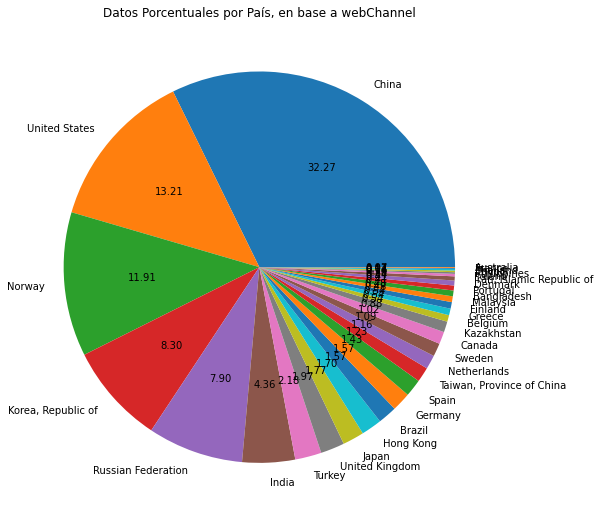

In [48]:
 #Porcenteje del pais respecto a las series emitidas
print('A continuación se presenta el % serie emitidas por Pais en el mes de de diciembre de 2020' +'\n' + 'en base al campo webChannel'+'\n' )
#print((TV_Maze_Show['webChannel.country.name'].value_counts() / len(TV_Maze_Show['webChannel.country.name']))*100)

plot= TV_Maze_Show['webChannel.country.name'].value_counts().plot(kind='pie',
                                                                  autopct='%.2f',
                                                                figsize=(9,9),
                                                                  ylabel='',
                                                                title='Datos Porcentuales por País, en base a webChannel')
plot

A continuación se presenta el % serie emitidas por Pais en el mes de de diciembre de 2020
en base al campo network


<AxesSubplot:title={'center':'Datos porcentuales por País en base a Network'}>

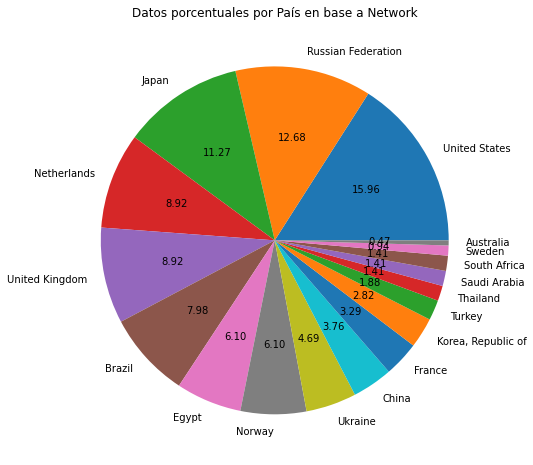

In [42]:
#Porcenteje del pais respecto a las series emitidas
print('A continuación se presenta el % serie emitidas por Pais en el mes de de diciembre de 2020' +'\n' + 'en base al campo network')
#print(TV_Maze_Show['webChannel.country.name'].value_counts() / len(TV_Maze_Show['webChannel.country.name'])*100)

plot= TV_Maze_Show['network.country.name'].value_counts().plot(kind='pie',
                                                                  autopct='%.2f',
                                                                figsize=(8,8),
                                                                 ylabel='',
                                                                title='Datos porcentuales por País en base a Network')
plot

### d) Rating, serie por país y género del mes